# Bootstrap hypothesis testing

Efron and Tibshirani suggest the algorithm for comparing the means of two independent samples.

[An Introduction to the Bootstrap]()  
[wiki](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

1. Calculate the test statistic
   $$
   t=\frac{\bar{x}-\bar{y}}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}
   $$
1. Create two new data sets:
   $$
       \begin{aligned}
       x'_i&=x_i-\bar{x}+\bar{z} \\
       y'_i&=y_i-\bar{y}+\bar{z} \\
       \end{aligned}
   $$
   where $\bar{z}$ is the mean of the combined sample
1. Draw a random sample $x^*_i$ of size $n$ with replacement from $x'_i$ and another random sample $y^*_i$ of size $m$ with replacement from $y'_i$
1. Calculate the test statistic
   $$
   t^*=\frac{\bar{x*}-\bar{y*}}{\sqrt{\sigma_x^*2/n_x+\sigma_y^*2/n_y}}
   $$
1. Repeat 3 and 4 B times(eg B=1000) to collect B values of the test statistic.
1. Estimate the p-value as 

$$
p=\frac{count(t^*_i\geq t)}{B}
$$

Note:
The two-sample t-test for unpaired data is defined as:
$$
\begin{aligned}
H_0&:	&\mu_1&=\mu_2 \\
H_a&:	&\mu_1&≠\mu_2
\end{aligned}
$$
Test Statistic:	$T=\frac{\bar{Y_1}-\bar{Y_2}}{\sqrt{s^2_1/N_1+s^2_2/N_2}}$
where $N_1$ and $N_2$ are the sample sizes, $\bar{Y_1}$ and $\bar{Y_2}$ are the sample means, and $s^2_1$ and $s^2_2$ are the sample variances.

If equal variances are assumed, then the formula reduces to:

$T=\frac{\bar{Y_1}-\bar{Y_2}}{s_p\sqrt{1/N_1+1/N_2}}$
where
$s^2_p=\frac{(N_1−1)s^2_1+(N_2−1)s^2_2}{N_1+N_2−2}$

If variances and size are also equal, then:
$T=\frac{\bar{Y_1}-\bar{Y_2}}{s\sqrt{2/N}}$


In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Population is $X ~~ N(1.12345,3.678679)$

In [423]:
population_mean = 1.12345
population_var  = 3.678679
population_size = int(1e7)
population = population_mean + population_var**0.5*np.random.randn(population_size)

Can change the population to something other than normal population

In [424]:
# population = np.random.chisquare(30,population_size)


In [425]:
population

array([3.63938453, 1.06693062, 2.51142713, ..., 1.77318291, 2.14825639,
       3.25236395])

(array([3.500000e+01, 4.061000e+03, 1.016040e+05, 9.450410e+05,
        3.152591e+06, 3.820617e+06, 1.691483e+06, 2.689530e+05,
        1.532000e+04, 2.950000e+02]),
 array([-9.3491342 , -7.33175017, -5.31436614, -3.29698211, -1.27959808,
         0.73778596,  2.75516999,  4.77255402,  6.78993805,  8.80732209,
        10.82470612]),
 <BarContainer object of 10 artists>)

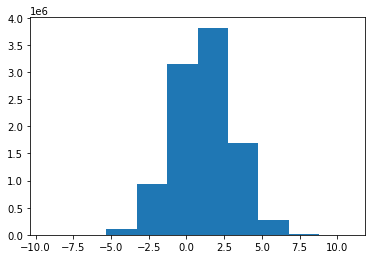

In [426]:
plt.hist(population)

Draw two sample (X and Y) from population  
X has size of 1000 and Y has size of 4000

In [427]:
size_x = 1000
size_y = 4000

sample_x = np.random.choice(population, size=size_x, replace=False)
sample_y = np.random.choice(population, size=size_y, replace=False)


Can change the sample for negative case

In [428]:
# sample_x = (population_mean-0.2) + (population_var+0.0)**0.5*np.random.randn(size_x)


(array([1.000e+00, 5.000e+00, 5.500e+01, 2.960e+02, 7.590e+02, 1.195e+03,
        1.070e+03, 4.810e+02, 1.210e+02, 1.700e+01]),
 array([-7.45057115e+00, -5.95923673e+00, -4.46790232e+00, -2.97656790e+00,
        -1.48523349e+00,  6.10092703e-03,  1.49743534e+00,  2.98876976e+00,
         4.48010417e+00,  5.97143859e+00,  7.46277300e+00]),
 <BarContainer object of 10 artists>)

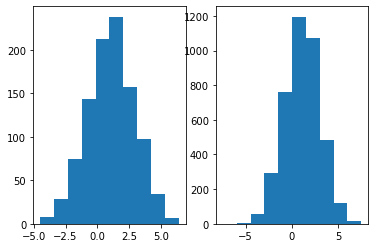

In [429]:
plt.subplot(121)
plt.hist(sample_x)
plt.subplot(122)
plt.hist(sample_y)


Test if they are from the same population

the test statistic:
$t=\frac{\bar{x}-\bar{y}}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}$

In [430]:
mean_x = np.mean(sample_x)
mean_y = np.mean(sample_y)
combined_mean = np.mean(np.concatenate([sample_x, sample_y]))

In [431]:
mean_x, mean_y

(1.054840865440488, 1.0977865131955278)

In [432]:
def single_bootstrap_sample(sample: np.ndarray):
    return np.random.choice(sample, size=len(sample), replace=True) - np.mean(sample) - combined_mean


def single_bootstrap_statistic(sample_x: np.ndarray, sample_y: np.ndarray, statistic_func):
    bootstrapped_x, bootstrapped_y = single_bootstrap_sample( sample_x), single_bootstrap_sample(sample_y)
    return statistic_func(bootstrapped_x, bootstrapped_y)


def statistic_method(sample1: np.ndarray, sample2: np.ndarray):
    statistic = (np.mean(sample1)-np.mean(sample2))/np.sqrt(np.var(sample1,
                                                                     ddof=1)/len(sample1)+np.var(sample2, ddof=1)/len(sample2))
    return statistic

In [433]:
t_statistic = statistic_method(sample_x, sample_y)
t_statistic

-0.6588394482109038

Hence, the sampled (original) t-statistic = 0.41846568534825734

In [434]:
single_bootstrap_statistic(sample_x,sample_y,statistic_method)

-1.6375922454807954

In [435]:
bootstrap_time = 10000
bootstrapped_t_statistics = []
for i in range(bootstrap_time):
    bootstrapped_t_statistics.append(
        single_bootstrap_statistic(sample_x, sample_y, statistic_method)
    )


In [436]:
bootstrapped_t_statistics

[0.17043419582507602,
 1.0953122807642772,
 0.10316510661900204,
 1.2365152569184739,
 1.311526668934335,
 -0.4077876739776276,
 -0.23247764347641156,
 -1.4184073000329926,
 0.9677403681303708,
 0.11275729599609216,
 0.3401975025551639,
 -0.9048160982562569,
 -0.7362352496572163,
 0.8758114678252389,
 -0.8750808712432944,
 -0.47784504146563017,
 -1.4071622823729864,
 1.4585102875498903,
 0.2502984745065707,
 0.7077350257972576,
 1.722407905325764,
 -0.7730020993102101,
 -0.39280504766233426,
 0.7167747485223234,
 0.3652328281368581,
 -0.15624988299278747,
 1.2803439259119558,
 -0.089528407804329,
 0.10001870684566043,
 0.5712597857461779,
 0.011204698899449873,
 -1.3265542002998554,
 0.9427530738984887,
 0.4562836273276528,
 2.5249376695933052,
 0.37501360954001434,
 0.9708212556263357,
 1.1683350798870404,
 0.9626416889764796,
 -0.8806023524595326,
 2.04264217040692,
 -0.7716031572920048,
 -0.019472735853386623,
 0.5471867491551189,
 -1.0301146071195078,
 -0.3040678696045145,
 -0.1399

In [437]:
t_statistic

-0.6588394482109038

In [438]:
np.sum((np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic)).astype(int))

5123

In [439]:
(np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic)).astype(int)

array([0, 1, 0, ..., 0, 1, 1])

In [440]:
np.sum(np.where(np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic),1,0))

5123

# two-tailed t-test

In [441]:
p_value = np.sum((np.abs(bootstrapped_t_statistics)>=np.abs(t_statistic)).astype(int))/bootstrap_time
p_value

0.5123

Since p-value = 0.3345  
we cannot reject the null hypothesis and accept that X and Y have the same mean.  
**(the population of X and Y have the same mean)**